<a href="https://colab.research.google.com/github/saimaanasarikkala/DMassignment1/blob/main/petal(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import os
import IPython.display as display
from PIL import Image
import pandas as pd
import shutil
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
!mkdir data
!mkdir data/train
!mkdir data/test
!mkdir data/val

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/train’: File exists
mkdir: cannot create directory ‘data/test’: File exists
mkdir: cannot create directory ‘data/val’: File exists


In [ ]:
# !unzip "/content/drive/MyDrive/Plant Classification/tpu-getting-started.zip"

In [ ]:
import os
import tensorflow as tf
from PIL import Image
import io

# Replace 'data/train' with the desired output directory
output_dir = '/kaggle/working/data/test'

for i in os.listdir("/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/test"):
  # Replace 'your_file.tfrecord' with the actual path to your TFRecord file
  tfrecord_file_path = f'/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/test/{i}'

  # Create output directory if it doesn't exist
  os.makedirs(output_dir, exist_ok=True)

  # Create a TFRecordDataset
  dataset = tf.data.TFRecordDataset(tfrecord_file_path)

  # Iterate through the records in the dataset
  for record in dataset:
      # Parse the example using tf.train.Example
    example = tf.train.Example()
    example.ParseFromString(record.numpy())

      # Access the features in the example
    features = example.features.feature

      # Extract class, id, and image bytes
      #image_class = str(features['class'].int64_list.value[0])
    image_id = features['id'].bytes_list.value[0].decode('utf-8')
    image_data = features['image'].bytes_list.value[0]

      # Create output directory for the class if it doesn't exist
      # class_dir = os.path.join(output_dir, image_class)
    os.makedirs(output_dir, exist_ok=True)

      # Save the image to file
    image_path = os.path.join(output_dir, f'{image_id}.jpg')
    with open(image_path, 'wb') as img_file:
        img_file.write(image_data)

print("Conversion complete.")


Conversion complete.


In [ ]:
import os
import tensorflow as tf
from PIL import Image
import io

# Replace 'data/train' with the desired output directory
output_dir = '/kaggle/working/data/train'

for i in os.listdir("/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/train"):
  # Replace 'your_file.tfrecord' with the actual path to your TFRecord file
  tfrecord_file_path = f'/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/train/{i}'

  # Create output directory if it doesn't exist
  os.makedirs(output_dir, exist_ok=True)

  # Create a TFRecordDataset
  dataset = tf.data.TFRecordDataset(tfrecord_file_path)

  # Iterate through the records in the dataset
  for record in dataset:
      # Parse the example using tf.train.Example
    example = tf.train.Example()
    example.ParseFromString(record.numpy())

      # Access the features in the example
    features = example.features.feature

      # Extract class, id, and image bytes
    image_class = str(features['class'].int64_list.value[0])
    image_id = features['id'].bytes_list.value[0].decode('utf-8')
    image_data = features['image'].bytes_list.value[0]

      # Create output directory for the class if it doesn't exist
    class_dir = os.path.join(output_dir, image_class)
    os.makedirs(class_dir, exist_ok=True)

      # Save the image to file
    image_path = os.path.join(class_dir, f'{image_id}.jpg')
    with open(image_path, 'wb') as img_file:
        img_file.write(image_data)

print("Conversion complete.")


Conversion complete.


In [ ]:
import os
import tensorflow as tf
from PIL import Image
import io

# Replace 'data/train' with the desired output directory
output_dir = '/kaggle/working/data/val'

for i in os.listdir("/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val"):
  # Replace 'your_file.tfrecord' with the actual path to your TFRecord file
  tfrecord_file_path = f'/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/{i}'

  # Create output directory if it doesn't exist
  os.makedirs(output_dir, exist_ok=True)

  # Create a TFRecordDataset
  dataset = tf.data.TFRecordDataset(tfrecord_file_path)

  # Iterate through the records in the dataset
  for record in dataset:
      # Parse the example using tf.train.Example
    example = tf.train.Example()
    example.ParseFromString(record.numpy())

      # Access the features in the example
    features = example.features.feature

      # Extract class, id, and image bytes
    image_class = str(features['class'].int64_list.value[0])
    image_id = features['id'].bytes_list.value[0].decode('utf-8')
    image_data = features['image'].bytes_list.value[0]

      # Create output directory for the class if it doesn't exist
    class_dir = os.path.join(output_dir, image_class)
    os.makedirs(class_dir, exist_ok=True)

      # Save the image to file
    image_path = os.path.join(class_dir, f'{image_id}.jpg')
    with open(image_path, 'wb') as img_file:
        img_file.write(image_data)

print("Conversion complete.")


Conversion complete.


In [ ]:
!pip install transformers
!pip install timm

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch
import torchvision

import os
import zipfile

from pathlib import Path

import requests

from torch import nn
from torchvision import transforms
!pip install -q torchinfo
from torchinfo import summary

try:
    from going_modular.going_modular import data_setup, engine
except:
    print("[INFO] Couldn't find going_modular scripts... downloading them from GitHub.")
    !git clone https://github.com/mrdbourke/pytorch-deep-learning
    !mv pytorch-deep-learning/going_modular .
    !rm -rf pytorch-deep-learning
    from going_modular.going_modular import data_setup, engine

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
data_path = Path("/kaggle/working/")
image_path = data_path / "data"

train_dir = image_path / "train"
test_dir = image_path / "val"

In [ ]:
manual_transforms = transforms.Compose([
    transforms.Resize((256, 256)), # 1. Reshape all images to 256x256 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.0, 0.0, 0.0], # 3. A mean of [0.0, 0.0, 0.0] (across each colour channel)
                         std=[1.0, 1.0, 1.0]) # 4. A standard deviation of [1.0, 1.0, 1.0] (across each colour channel),
])

In [ ]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=manual_transforms, # resize, convert images to between 0 & 1 and normalize them
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names
num_classes = len(class_names)

In [ ]:
import timm

model_name = "timm/mobilevitv2_050.cvnets_in1k"
model_ft = None
model_ft = timm.create_model(model_name, pretrained=True)
num_ftrs = model_ft.head.in_features
model_ft.head.fc = nn.Sequential(nn.Linear(in_features=num_ftrs, out_features=num_classes),nn.Softmax(dim=1))
#model_ft.head.fc = nn.Sequential(
#    nn.Linear(in_features=num_ftrs, out_features=512),
#    nn.ReLU(),
#    nn.Dropout(0.5),
#    nn.Linear(in_features=512, out_features=256),
#    nn.ReLU(),
#    nn.Dropout(0.3),
#    nn.Linear(in_features=256, out_features=num_classes),
#    nn.Softmax(dim=1)
#)
input_size = 256
model = model_ft

In [ ]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for param in model.parameters():
    param.requires_grad = True

In [ ]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

In [ ]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
!pip install GPUtil

from GPUtil import showUtilization as gpu_usage
gpu_usage()

| ID | GPU | MEM |
------------------
|  0 |  0% | 97% |


In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()
cuda.select_device(0)

<weakproxy at 0x7b9e2b2a64d0 to Device at 0x7b9e2b291e40>

In [ ]:
gpu_usage()

| ID | GPU  | MEM |
-------------------
|  0 | 100% |  2% |


In [ ]:
# Set the random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=10,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 4.3849 | train_acc: 0.3079 | test_loss: 4.2923 | test_acc: 0.3696
Epoch: 2 | train_loss: 4.2415 | train_acc: 0.4255 | test_loss: 4.1997 | test_acc: 0.4663
Epoch: 3 | train_loss: 4.1579 | train_acc: 0.5099 | test_loss: 4.1340 | test_acc: 0.5323
Epoch: 4 | train_loss: 4.1014 | train_acc: 0.5656 | test_loss: 4.1049 | test_acc: 0.5603
Epoch: 5 | train_loss: 4.0416 | train_acc: 0.6289 | test_loss: 4.0254 | test_acc: 0.6487
Epoch: 6 | train_loss: 3.9722 | train_acc: 0.6997 | test_loss: 3.9657 | test_acc: 0.7023
Epoch: 7 | train_loss: 3.9313 | train_acc: 0.7387 | test_loss: 3.9531 | test_acc: 0.7185
Epoch: 8 | train_loss: 3.9044 | train_acc: 0.7649 | test_loss: 3.9142 | test_acc: 0.7543
Epoch: 9 | train_loss: 3.8719 | train_acc: 0.7954 | test_loss: 3.9101 | test_acc: 0.7602
Epoch: 10 | train_loss: 3.8563 | train_acc: 0.8114 | test_loss: 3.8927 | test_acc: 0.7745
[INFO] Total training time: 429.203 seconds


In [ ]:
!pip install onnx onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 55.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
import torch

def save_trained_models(model_ft, PATH):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_ft = model_ft.to(device)

    torch.save(model_ft.state_dict(), PATH + '.pth')

    x = torch.ones((1, 3, 256, 256), device=device)

    torch.onnx.export(model_ft, x, PATH + '.onnx', opset_version=12, input_names=['input'],
                      output_names=['output'],
                      dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}})

save_trained_models(model, "model")


/opt/conda/lib/python3.10/site-packages/timm/models/mobilevit.py:508: TracerWarning: Converting a tensor to a Python float might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  new_h, new_w = math.ceil(H / patch_h) * patch_h, math.ceil(W / patch_w) * patch_w
/opt/conda/lib/python3.10/site-packages/timm/models/mobilevit.py:511: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if new_h != H or new_w != W:


================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



[INFO] Couldn't find helper_functions.py, downloading...


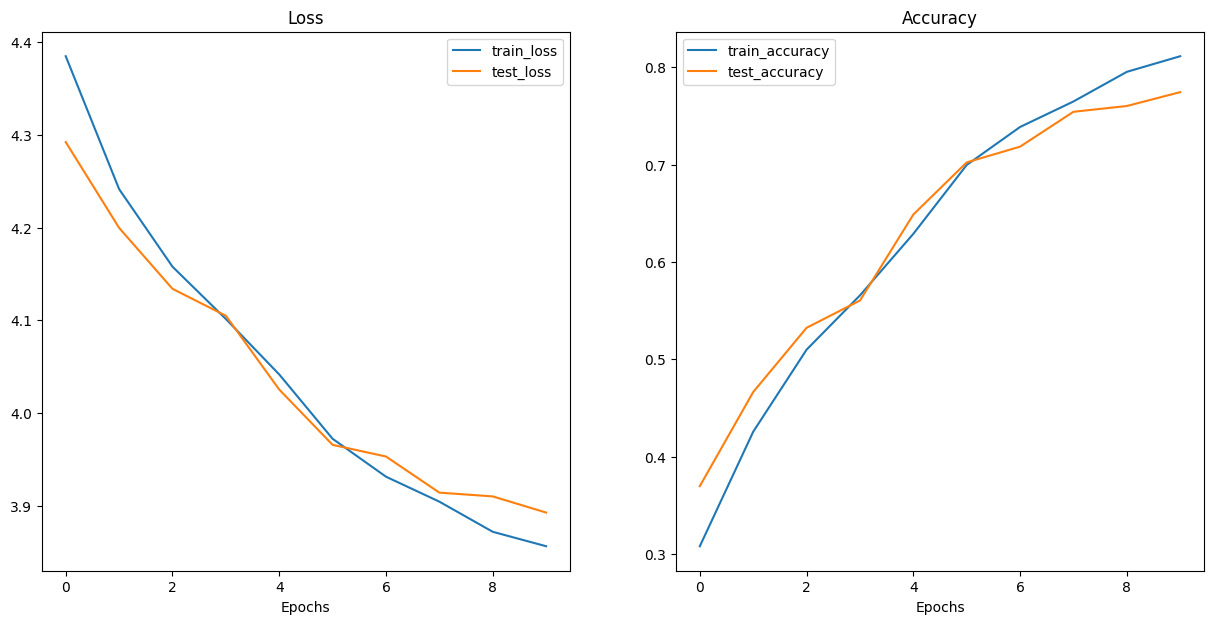

In [ ]:
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("/kaggle/working/helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)

In [ ]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):


    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    image_transform = transform

    ### Predict on image ###

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
    # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

      # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
      target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

      # 9. Convert prediction probabilities -> prediction labels
      target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}, Image path: {image_path}")
    plt.axis(False);

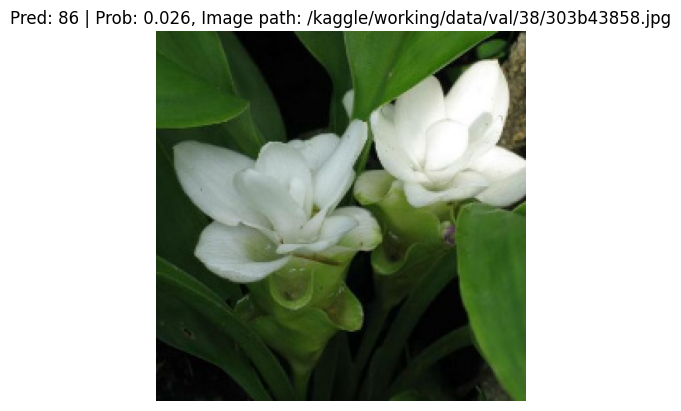

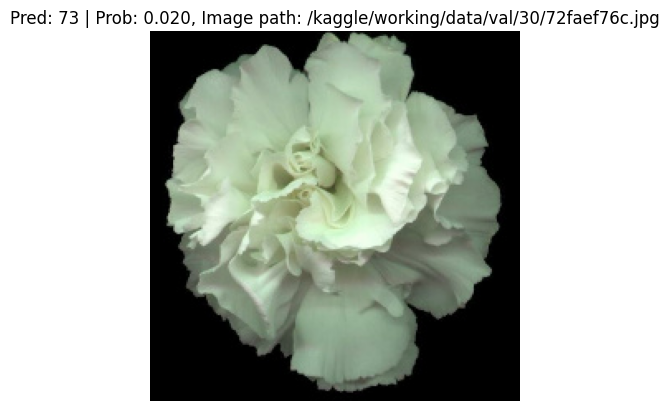

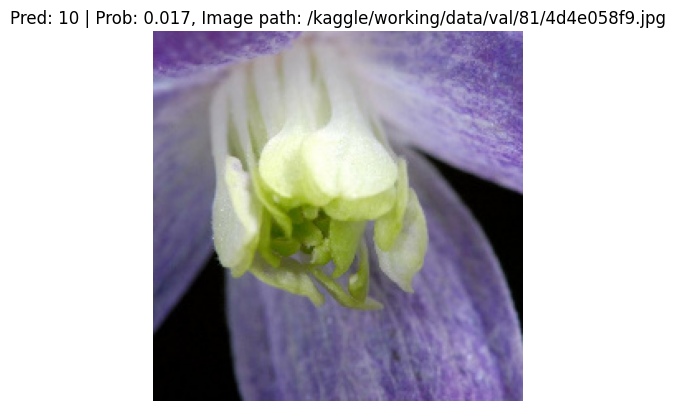

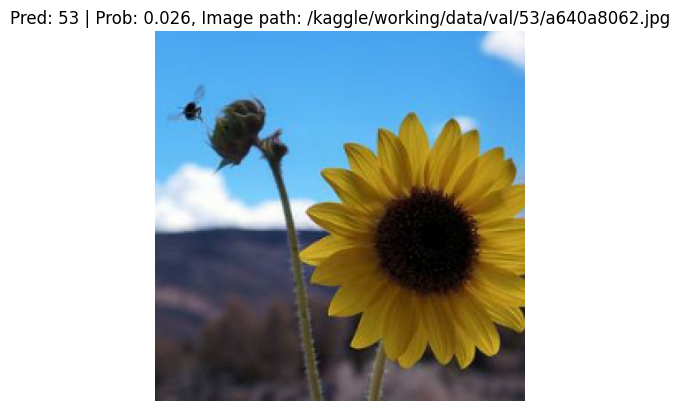

In [ ]:
# Get a random list of image paths from test set
import random
num_images_to_plot = 4
test_image_path_list = list(Path(test_dir).glob("*/*.jpg")) # get list all image paths from test data
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        transform=manual_transforms, # optionally pass in a specified transform from our pretrained model weights
                        image_size=(256, 256))

In [ ]:

image_transform = manual_transforms
model.to(device)
model.eval()

data = {"id":[],"labels":[]}

for image_path in os.listdir("/kaggle/working/data/test/"):
    img = Image.open(f"/kaggle/working/data/test/{image_path}")
    with torch.inference_mode():
    # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

      # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
      target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

      # 9. Convert prediction probabilities -> prediction labels
      target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

      data['labels'].append(class_names[target_image_pred_label])
      data['id'].append(image_path.replace(".jpg",""))

In [ ]:
data

{'id': ['63de51e03',
  '14024c433',
  '2103e7549',
  'd1dacf9dd',
  'b8e0b2ee2',
  'dd4899180',
  'a6ec0a798',
  'b5a739d1d',
  'a3d0a07a8',
  '778808485',
  '5fc2cecce',
  'a5ae66568',
  '9a513b251',
  '0e6cad3b3',
  '4dccae9a1',
  'a94f6dde1',
  '4bd6a1f9a',
  '146fc86a4',
  'a2fcedaf7',
  'bbbc5f9a8',
  'b5422eec0',
  '9b49af313',
  'd9af9a571',
  'aab7f897d',
  'b51c9863e',
  'b845a0f00',
  '651a0b6cf',
  '1ef426390',
  '60a51b6b7',
  '728a12444',
  '4181595b9',
  '8a904fdea',
  '5c88d781e',
  '505472dd2',
  '52e436680',
  'a01133fe3',
  '869035e2d',
  '83a004123',
  'cecc8c55b',
  '121fc6463',
  'f4db33d12',
  '83714b580',
  '06291a920',
  'c548502c7',
  '08820c254',
  '74f0d70ef',
  '1314201bc',
  'f1b2738d0',
  '64c056f47',
  'd69c942d9',
  '7244c8b3b',
  '7be2867e1',
  'd9111ad4b',
  'a810efddc',
  '1474acef0',
  'e1da2a9a7',
  '5d3cac88b',
  '8ba970109',
  '4612e397b',
  'cf95485eb',
  '6959092b7',
  'f93b17627',
  'aa560af38',
  '645e6c963',
  'd0b48815a',
  '81f2fa04d',
  '8

In [ ]:
import pandas as pd

df = pd.DataFrame(data)

In [ ]:
df

,id,labels
0,63de51e03,46
1,14024c433,71
2,2103e7549,90
3,d1dacf9dd,91
4,b8e0b2ee2,102
...,...,...
7377,a18ae9e89,53
7378,1b426a50d,0
7379,2e211accd,84
7380,6c269a2b9,67


In [ ]:
%cd /kaggle/working/

/kaggle/working


In [ ]:
!ls

submission.csv


In [ ]:
!rm -r __pycache__
!rm -r data
!rm helper_functions.py
!rm model.pth
!rm model.onnx
!rm -r going_modular

rm: cannot remove '__pycache__': No such file or directory
rm: cannot remove 'data': No such file or directory
rm: cannot remove 'helper_functions.py': No such file or directory
rm: cannot remove 'model.pth': No such file or directory
rm: cannot remove 'model.onnx': No such file or directory
rm: cannot remove 'going_modular': No such file or directory


In [ ]:
df.to_csv("submission.csv",index=False)

In [ ]:
!ls